# Proyecto: Análisis del mercado inmobiliario de la Ciudad de Buenos Aires

Mentor: Javier Lezama.

javitolez@gmail.com

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal www.Properati.com.ar.

#### Autor: Pablo Borja

# El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

#Los atributos

A continuación vamos a describir los atributos que consideramos en esta muestra:
* id: id de la propiedad
* created_on: fecha en la que la propiedad ingresó al sitio
* operation: alquiler (rent) o venta (sell)
* property_type: tipo de propiedad (casa, departamento, ph, etcétera)
* place_with_parent_names: nombre del lugar donde se encuentra la propiedad según el publicador
* lat-lon: coordenadas concatenadas
* lat: latitud
* lon: longitud
* price: precio en la moneda especificada en currency
* currency: divisa en la que está expresada la publicación
* price_aprox_usd: precio aproximado en dólares estadounidenses
* surface_total_in_m2: superficie total (en metros cuadrados)
* surface_covered_in_m2: superficie cubierta (en metros cuadrados)
* price_usd_per_m2: precio por metro cuadrado en dólares (precio dólares / superficie)
* floor: número de piso (si corresponde)
* rooms: cantidad de ambientes
* expenses: expensas (si corresponde)
* barrio: barrio según cartografía oficial
* properati_url: url de la publicación en Properati

Objetivos del practico aprendizaje automático:

El objetivo de este práctico es trabajar con el mismo dateset trabajado en el práctico dos, trabajar con diferentes modelos de regresión no trabajados antes y lo visto en el módulo de clases.
Para eso trabajaremos con el dataset resultante del practico dos para armar diferentes modelos para predecir el precio de las propiedades en dólares.

# Manos a la obra


Partiremos con el dataset resultante del práctico dos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Mentoria Análisis y Curación de Datos/df_filtered.csv")

In [3]:
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,x1_VILLA LUGANO,x1_VILLA LURO,x1_VILLA ORTUZAR,x1_VILLA PUEYRREDON,x1_VILLA REAL,x1_VILLA RIACHUELO,x1_VILLA SANTA RITA,x1_VILLA SOLDATI,x1_VILLA URQUIZA,price_m2
0,2017-08-02,sell,3,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2811.475410
1,2017-08-09,sell,3,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.0,30.0,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.000000
2,2017-08-11,sell,3,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.0,26.0,98.677368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3846.153846
3,2017-08-12,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.0,48.0,48.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2291.666667
4,2017-08-15,sell,3,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.0,20.0,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.000000


In [4]:
df = df.select_dtypes([np.number])

# Ejercicio 1: División de datos en conjuntos de entrenamiento y evaluación.

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o training) y evaluación (o test).

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('price_aprox_usd', axis=1)
y = df['price_aprox_usd']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Ejercicio 2: Árboles de decisión.

Entrenar un arbol de decisión de regresión para predecir el precio de las propiedades en dolares, variando sus hiperparametros tales como la profundidad, función de coste, etc.

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
# Usando otro enfoque que no sea usando GridSearch
from sklearn.metrics import mean_squared_error

In [16]:
dtr_mse_train = []
dtr_mse_test = []

In [17]:
for i in range(2, 16):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    y_som_train = dtr.predict(X_train)
    dtr_mse_train.append(np.sqrt(mean_squared_error(y_train, y_som_train)))
    y_som_test = dtr.predict(X_test)
    dtr_mse_test.append(np.sqrt(mean_squared_error(y_test, y_som_test)))

# Ejercicio 3: Métricas sobre el conjunto de evaluación.

Análizar como varia la función de coste según se modifican los hiperparametros, i.e, la profundidad de los mismos, etc.

Graficar los valores de la función costo en ambos conjuntos, de entrenamiento (o training) y evaluación (o test).

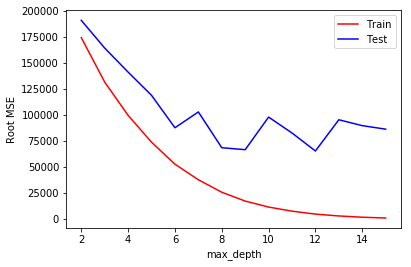

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(2, 16), dtr_mse_train, 'r', label='Train')
ax.plot(range(2, 16), dtr_mse_test, 'b', label='Test')
ax.set_xlabel("max_depth")
ax.set_ylabel("Root MSE")
leg = ax.legend();


In [20]:
print(min(dtr_mse_test))

65370.22669596693


# Ejercicio 4: Realizar lo mismo ahora con un modelo de KNN

Entrenar un KNN y analizar su comportamiento como en el modelo anterior.

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knr_mse_train = []
knr_mse_test = []

In [23]:
for i in range(2, 15):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train, y_train)
    y_som_train = knr.predict(X_train)
    knr_mse_train.append(np.sqrt(mean_squared_error(y_train, y_som_train)))
    y_som_test = knr.predict(X_test)
    knr_mse_test.append(np.sqrt(mean_squared_error(y_test, y_som_test)))

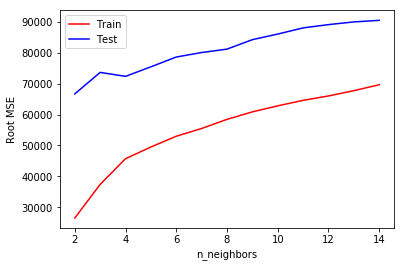

In [24]:
fig, ax = plt.subplots()
ax.plot(range(2, 15), knr_mse_train, 'r', label='Train')
ax.plot(range(2, 15), knr_mse_test, 'b', label='Test')
ax.set_xlabel("n_neighbors")
ax.set_ylabel("Root MSE")
leg = ax.legend();

In [26]:
print(min(knr_mse_test))

66675.52992880746


# Informe final

Presentar un informe final con los datos inferidos del dataset utilizando herramientas gráficas y escritas teniendo en cuenta los destinatarios. En este caso colegas de la diplomatura para preparar el informe con un background adecuado al destinatario.

In [ ]:
# INFORME ESCRITO
#
# Dado los resultados de ambos algoritmos queda claro que el más robusti a pesar de su indestabilidad
# es el Arbol, porque KNN tanto las curvas de test y train no llegan si quiera a acercarse.
# Igual por los resultados se puede concluir que se necesita un mayor trabajo sobre el dataset
# ya sea creando nuevos atributos o seguir procesando más los datos, por ejemplo aplicar estadarización.
# Eso queda para un futuro cuando se disponga de más tiempo para ello.